# Рубежный контроль №1
**Бурашников Владимир Владимирович, группа ИУ5-22М.**Вариант №1, набор данных №2.

## Задание
Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных с использованием библиотек Matplotlib и Seaborn. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков? Проведите корреляционный анализ. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

## Решение

### Загрузка и предобработка данных

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data = pd.read_csv('/home/vladimir/iris.csv', sep=",")

In [18]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
data.shape

(150, 5)

In [20]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [21]:
# ищем пропуски
for c in data.columns:
    null_count = data[data[c].isnull()].shape[0]
    print(f'{c} - {null_count}')

sepal.length - 0
sepal.width - 0
petal.length - 0
petal.width - 0
variety - 0


In [22]:
data.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [23]:
# характеристки набора данных
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости.

Построим диаграмму рассеяния для двух признаков - sepal.width и sepal.length. Видим, что первый признак влияет на второй и между ними существует зависимость, с увеличением первого признака увеличивается и второй.

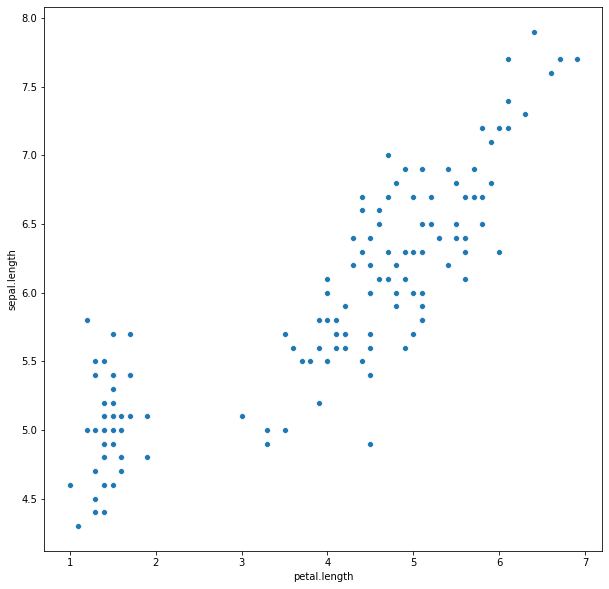

In [50]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='petal.length', y='sepal.length', data=data)

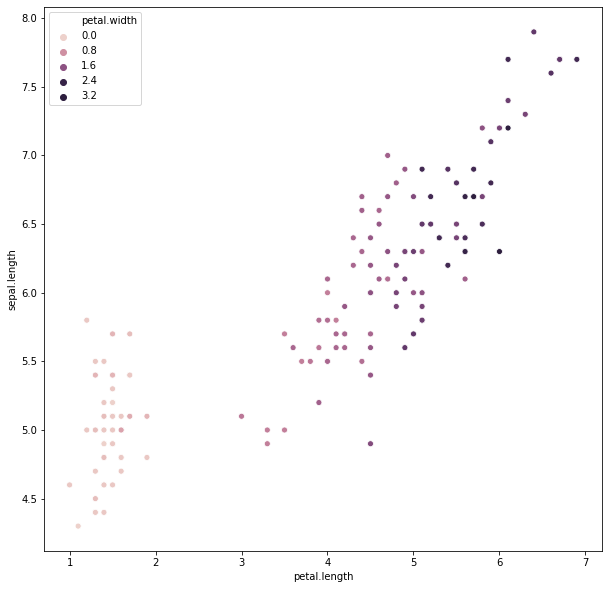

In [51]:
# Оценим влияние признака variety на зависимость.
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='petal.length', y='sepal.length', data=data, hue='petal.width')

## Гистограмма

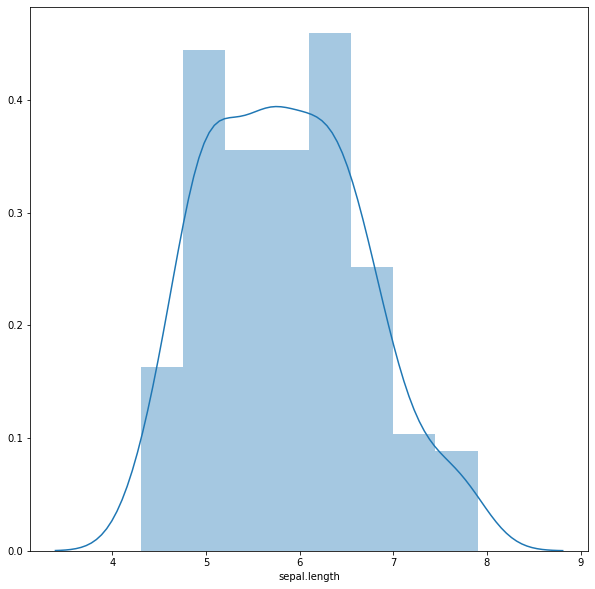

In [35]:
# Определение наиболее вероятного значения признака sepal.length
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['sepal.length'])
# Выяснили, что это около 5.8

In [36]:
data['sepal.length'].median()

5.8

## Joinplot

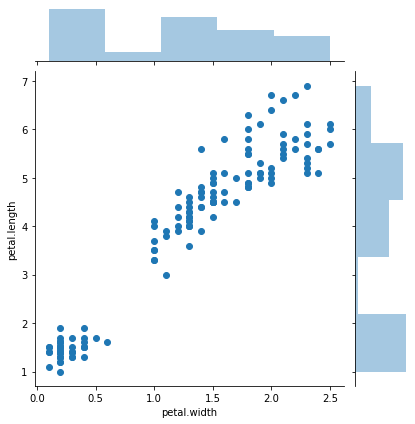

In [53]:
# joinplot отображает зависимость petal.width от petal.length
p = sns.jointplot( "petal.width", "petal.length", data)

## Парные диаграммы

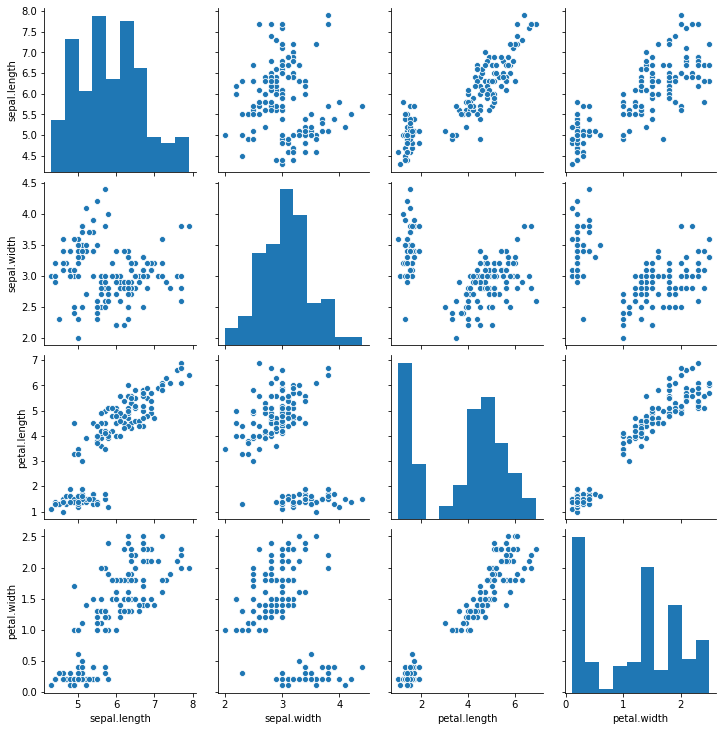

In [54]:
# Парные диаграммы по признакам датасета
sns.pairplot(data)

/home/vladimir/PycharmProjects/giis_lab1/env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/vladimir/PycharmProjects/giis_lab1/env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/vladimir/PycharmProjects/giis_lab1/env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/vladimir/PycharmProjects/giis_lab1/env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/vladimir/PycharmProjects/giis_lab1/env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a

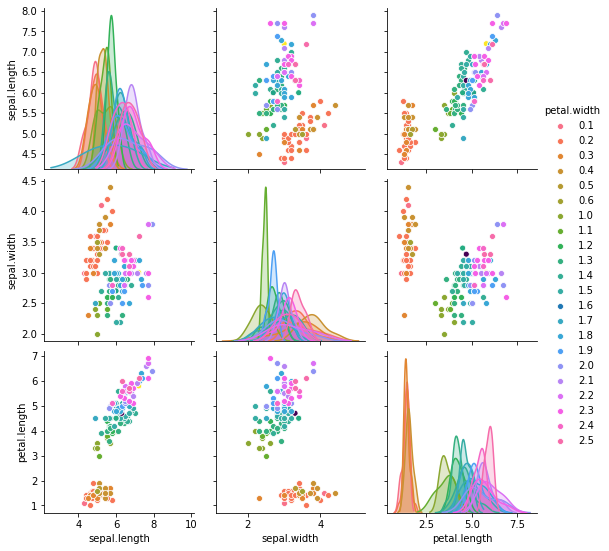

In [55]:
# Группировка по значениям признака variety
sns.pairplot(data, hue="petal.width")

## Ящик с усами

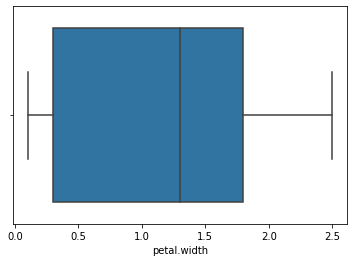

In [56]:
# Одномерное распределение вероятности
sns.boxplot(x=data['petal.width'])

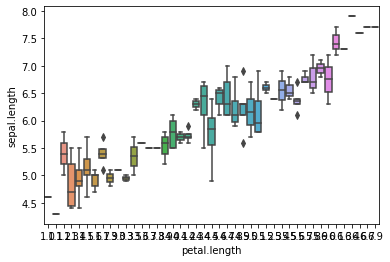

In [57]:
# Распределение параметра petal.length сгруппированные по sepal.length
sns.boxplot(x='petal.length', y='sepal.length', data=data)

## Violin plot

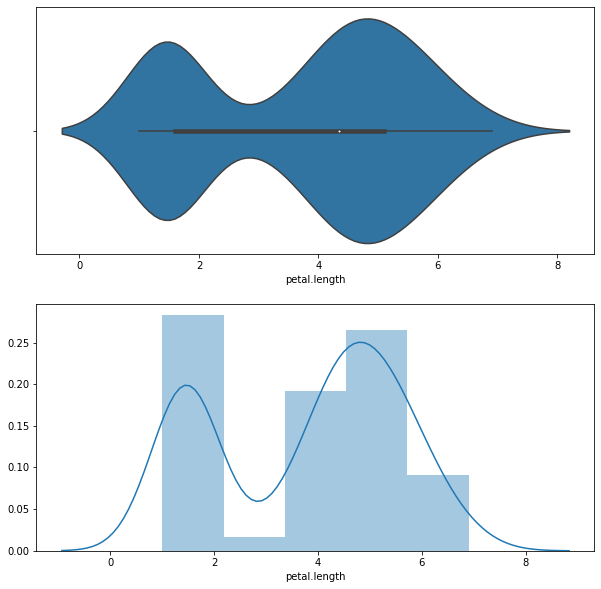

In [59]:
# Распределение плотности признака University Rating
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['petal.length'])
sns.distplot(data['petal.length'], ax=ax[1])

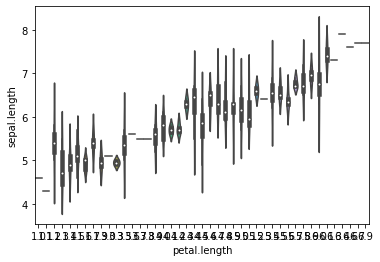

In [60]:
# Распределение параметра GRE Score сгруппированные по Chance of Admit.
sns.violinplot(x='petal.length', y='sepal.length', data=data)

## Корреляционный анализ

In [61]:
data.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [62]:

data.corr(method='spearman')

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.166778,0.881898,0.834289
sepal.width,-0.166778,1.000000,-0.309635,-0.289032
petal.length,0.881898,-0.309635,1.000000,0.937667
petal.width,0.834289,-0.289032,0.937667,1.000000


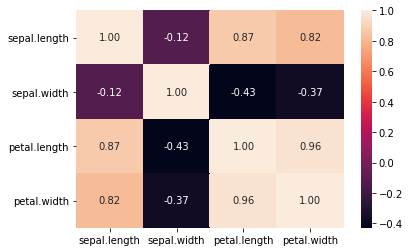

In [70]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')

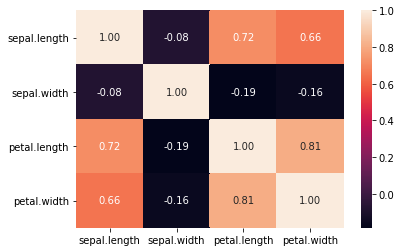

In [71]:
sns.heatmap(data.corr(method='kendall'), annot=True, fmt='.2f')

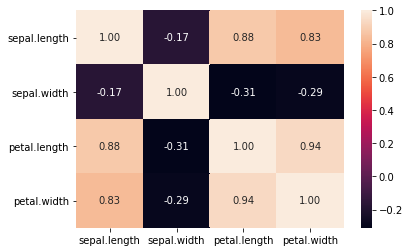

In [72]:
sns.heatmap(data.corr(method='spearman'), annot=True, fmt='.2f')

## Вывод

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

На основе корреляционной матрицы можно сделать следующие выводы:

1. Целевой признак petal.length хорошо корреллирует с остальными признаками, слабее всего с sepal.width, что логично, т.к. этот признак слабее влияет на petal.length
2. Признаки petal.width и sepal.length коррелируют друг с другом. Можно оставить в модели один из этих признаков, к примеру, petal.width, они примерно одинаково коррелируют с целевым признаком.


В ходе выполнения РК1 был проведен разведочный анализ данных о прогнозе приема студентов. Были исследованы основные характеристики датасета, а также проведено визуальное исследование данных в результате которого были построены графики: диаграмма рассеяния, гистограммы распределения, joinplot(Комбинация гистограмм и диаграмм рассеивания), парные диаграммы, диаграмма "ящик с усами" и графики violin plot.

Диаграмма рассеивания позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Исследовалась взаимосвязь между признаками - petal.length и sepal.length.

Гистограмма распределения позволяет оценить плотность вероятности распределения данных. При помощи гистограммы было исследовано распределение признака sepal.length. По гистограмме частот можно предположить, что признак описывается законом, близким к нормальному, и имеет наиболее вероятное значение, равное 5.8. 

Joinplot - комбинация гистограмм и диаграмм рассеивания. С помощью этой гистограммы исследовалась взаимосвязь между признаками - petal.width и petal.length. По графику видно, что чем больше petal.length, тем больше petal.width.

Парные диаграммы представляют комбинацию гистограмм и диаграмм рассеивания для всего набора данных. Вывод содержит множество диаграмм рассеивания и гистограмм распределения.

На графиках violin plot по краям отображаются распределения плотности. При помощи данного вида графиков исследовался признак petal.length. Вместе с гистограммой график показывает, что наибольшее значение приходится примерно на 5.